<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<hr>

# Copernicus Sentinel-3 SLSTR NRT - Aerosol product - Level 2

### About

The [Copernicus Sentinel-3 SLSTR Near-Real-Time (NRT) Aerosol product](https://navigator.eumetsat.int/product/EO:EUM:DAT:0306?query=SLSTR%20Level%202%20Aerosol%20Optical%20Depth%20in%20NRT%20-%20Sentinel-3&s=advanced) quantifies the abundance of all aerosol particles suspended in the air and monitors their global distribution and long-range transport, at the scale of 9.5 x 9.5 km<sup>2</sup>. Aerosol Optical Depth is often used as a proxy for the amount of aerosols in the air.

#### Case Event
This notebook provides an introduction to the Sentinel-3 SLSTR Aerosol Product focusing on the [Canadian Fires](https://www.bbc.com/news/world-us-canada-65816466) that occurred in June 2023. The data visualization shows a smoke plume over the northeastern part of USA.

### Basic Facts

> **Spatial resolution**: `9.5km x 9.5km` <br>
> **Spatial coverage**: `Global (ocean and land surfaces)` <br>
> **Revisit time**:  `daily, 3 hours after sensing time` <br>
> **Data availability**: `since August 2020`


### How to access the data

The Sentinel-3 SLSTR Near Real Time Level 2 Aerosol product is disseminated as zipped archives and can be downloaded via the [EUMETSAT Data Store](https://data.eumetsat.int/data/map/EO:EUM:DAT:0416). You have to [create an account](https://eoportal.eumetsat.int/userMgmt/register.faces) for the EUMETSAT Earth Observation Portal.

### Module outline
* [1 - Load Sentinel-3 SLSTR NRT AOD data](#load_cal)
* [2 - Extract AOD variables](#extract_cal)
* [3 - Visualize AOD Ocean and AOD land information](#visualize_cal)

<hr>

#### Load required libraries

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id='load'></a>Load Sentinel-3 SLSTR Near-Real-Time AOD data

[OPTIONAL] The first step is to download the data. You can use [EUMDAC](https://eumetsatspace.atlassian.net/wiki/spaces/EUMDAC/overview), a Python client for EUMETSAT Data Access Services, which provides simple access to EUMETSAT data from a variety of satellite missions.

In [3]:
#!eumdac download --collection EO:EUM:DAT:0416 --product S3A_SL_2_AOD____20230607T152755_20230607T153254_20230607T174409_0299_099_339______MAR_O_NR_003.SEN3

Processing 1 product.
Using order: 2023-06-28#0002
Output directory: /home/jovyan/00_wildfire_short_course
Job 1: Downloading /home/jovyan/00_wildfire_short_course/S3A_SL_2_AOD____20230607T152755_20230607T153254_20230607T174409_0299_099_339______MAR_O_NR_003.SEN3.zip


[OPTIONAL] The next step is to unzip the files from the zipped archive downloaded. This is optional as we have already unzipped the file for you. This is why the code is commented out. The zipped archive contains data in the `netCDF` format. The day for which data was requested is 7 June 2023.

In [4]:
#import zipfile
#with zipfile.ZipFile('../eodata/wildfire_short_course/sentinel-3/b/aod/S3A_SL_2_AOD____20230607T152755_20230607T153254_20230607T174409_0299_099_339______MAR_O_NR_003.SEN3.zip', 'r') as zip_ref:
#    zip_ref.extractall('../eodata/wildfire_short_course/sentinel-3/b/aod/')

The Near-Real-Time Sentinel-3 Aerosol Optical Depth data are disseminated in `netCDF`. `netCDF` data can be loaded with the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `xr.open_dataset()`. 

You see that the data file contains two `dimensions`:
* `columns` and
* `rows`.

It further contains a long list of `data variables`, including:
* `AOD_550`,
* `AOD_550_Ocean_NonFiltered`,
* `AOD_550_Land`,
...

A data file contains further a set of `attributes`, which give you more information about the data file and the data it contains, e.g the `start_time` and `stop_time` or the `product_name`.

In [3]:
file1 = xr.open_mfdataset('../eodata/wildfire_short_course/sentinel-3/b/aod/S3A_SL_2_AOD____20230607T152755_20230607T153254_20230607T174409_0299_099_339______MAR_O_NR_003.SEN3/NRT_AOD.nc')
file1

<xarray.Dataset>
Dimensions:                                (rows: 211, columns: 157)
Dimensions without coordinates: rows, columns
Data variables: (12/58)
    AOD_550                                (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    AOD_550_Land                           (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    AOD_550_uncertainty                    (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    AOD_550_uncertainty_Land               (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    AOD_550_Merged_OceanLand               (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    AOD_670                                (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    ...                                     ...
    scattering_angle_oblique               (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    cloud_fraction_nadir                   (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    cloud_fraction_oblique                 (rows, columns) float32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    aod_quality_flags                      (rows, columns) uint16 dask.array<chunksize=(211, 157), meta=np.ndarray>
    SLN_L1b_quality_flags                  (rows, columns) uint32 dask.array<chunksize=(211, 157), meta=np.ndarray>
    SLO_L1b_quality_flags                  (rows, columns) uint32 dask.array<chunksize=(211, 157), meta=np.ndarray>
Attributes: (12/17)
    title:                  Surface directional Reflectance, retrieved and de...
    comment:                 
    netCDF_version:         4.2 of Jul  5 2012 17:07:43 $
    product_name:           S3A_SL_2_AOD____20230607T152755_20230607T153254_2...
    institution:            MAR
    source:                 IPF-SL-2-AOD 04.00
    ...                     ...
    absolute_orbit_number:  38042
    start_time:             2023-06-07T15:27:54.616705Z
    stop_time:              2023-06-07T15:32:53.702617Z
    processing_baseline:    AOD_NRT.003.00.00
    track_offset:           105
    start_offset:           1538

### <a id='extract'></a>Extract Aerosol Optical Depth variables

The next step is to extract the variables of interest. Let us select the following two variables:
* `AOD_550`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers ocean surfaces.*)
* `AOD_550_Land`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers land surfaces.*)

Both `xarray.DataArrays` have two dimensions (`rows` and `columns`) and the following attributes, which provide additional information about the variables:
* `long_name`
* `standard_name`
* `valid_min`
* `valid_max`
* `coordinates`

In [4]:
aod_ocean = file1.AOD_550
aod_land = file1.AOD_550_Land

print(aod_ocean)
print(' ')
print(aod_land)

<xarray.DataArray 'AOD_550' (rows: 211, columns: 157)>
dask.array<open_dataset-b6af81258c189f06b46b11324c590096AOD_550, shape=(211, 157), dtype=float32, chunksize=(211, 157), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Best quality (post-...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
    coordinates:    latitude, longitude
 
<xarray.DataArray 'AOD_550_Land' (rows: 211, columns: 157)>
dask.array<open_dataset-b6af81258c189f06b46b11324c590096AOD_550_Land, shape=(211, 157), dtype=float32, chunksize=(211, 157), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Only over land surf...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
    coordinates:    latitu

You can also load `latitude` and `longitude` information, which can be used later for visualizing the variables.

In [5]:
lat_nc = file1.latitude
lon_nc = file1.longitude

print(lat_nc)
print(' ')
print(lon_nc)

<xarray.DataArray 'latitude' (rows: 211, columns: 157)>
dask.array<open_dataset-b6af81258c189f06b46b11324c590096latitude, shape=(211, 157), dtype=float32, chunksize=(211, 157), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude at pixel centre
    standard_name:  latitude
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
 
<xarray.DataArray 'longitude' (rows: 211, columns: 157)>
dask.array<open_dataset-b6af81258c189f06b46b11324c590096longitude, shape=(211, 157), dtype=float32, chunksize=(211, 157), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Longitude at pixel centre
    standard_name:  longitude
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0


### <a id='visualize'></a> Visualize AOD Ocean and AOD Land variables

The final step is to visualize both variables, Aerosol Optical Depth over ocean and land together in one plot. You can use matplotlib's function `pcolormesh` for it.

Let us define a function called [visualize_s3_aod](./functions.ipynb#visualize_s3_aod) which visualizes both AOD variables together onto a map. The function takes the following keyword arguments (kwargs):
* `aod_ocean`: DataArray with AOD values over ocean
* `aod_land`: DataArray with AOD values over land
* `latitude`: DataArray with latitude information
* `longitude`: DataArray with longitude information
* `title`: Title of the plot
* `unit`: Unit of AOD
* `vmin` and `vmax`: Minimum and maximum values to be displayed on the map
* `color_scale`: Color scale the data shall be represented
* `projection`: Projection of the map

Now, let us apply the function [visualize_s3_aod](./functions.ipynb#visualize_s3_aod) to visualize both variables, `AOD Ocean` and `AOD Land`.

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


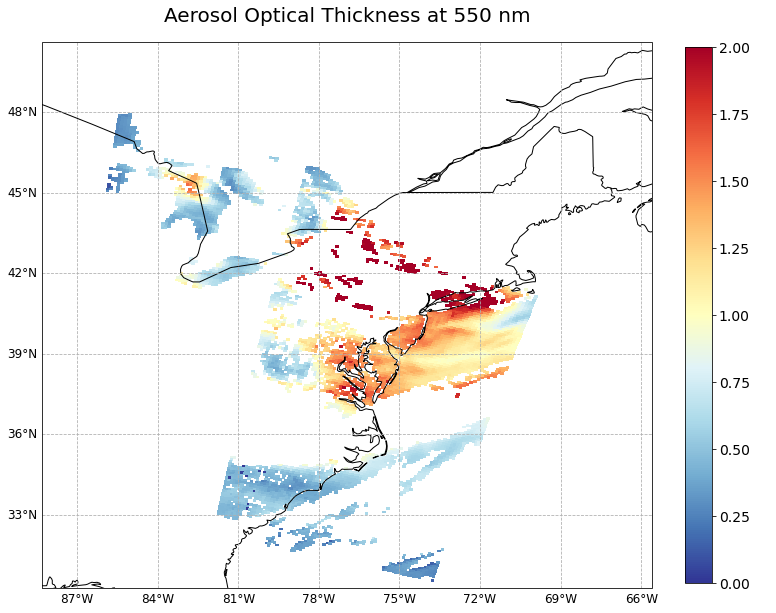

In [6]:
visualize_s3_aod(aod_ocean=aod_ocean, 
                 aod_land=aod_land, 
                 latitude=lat_nc, 
                 longitude=lon_nc, 
                 title='Aerosol Optical Thickness at 550 nm', 
                 unit=' ', 
                 vmin=0.,
                 vmax=2.0,
                 color_scale=cm.RdYlBu_r,
                 projection=ccrs.PlateCarree())

<br>

<hr>

### References
* EUMETSAT (2022): Collection 3.0 of Sentinel-3 NRT Level 2 aerosol product released soon. https://www.eumetsat.int/collection-30-sentinel-3-nrt-level-2-aerosol-product-released-soon

<hr>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">GPL-3.0 License</a> and is developed under a Copernicus contract.
    
<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>